In [ ]:
!pip install selenium
!pip install requests
!pip install pandas

  Using cached selenium-4.34.2-py3-none-any.whl.metadata (7.5 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached trio-0.30.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached trio_websocket-0.12.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
Using cached selenium-4.34.2-py3-none-any.whl (9.4 MB)
Using cached trio

In [13]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time

# Setup Chrome
options = Options()
# options.add_argument('--headless')  # Optional: run without showing browser
options.add_argument('--disable-gpu')
driver = webdriver.Chrome(options=options)

job_list = []

# Loop through 20 pages (fpn = 0 to 380 in steps of 20)
for offset in range(0, 400, 20):
    url = f"https://www.rozee.pk/job/jsearch/q/software/fc/1184/fpn/{offset}"
    print(f"Scraping page with fpn={offset} ...")
    driver.get(url)
    time.sleep(8)  # Wait for jobs to load

    job_cards = driver.find_elements(By.CLASS_NAME, 'job')
    print(f"Found {len(job_cards)} jobs on this page.")

    for card in job_cards:
        try:
            title = card.find_element(By.CSS_SELECTOR, 'h3.s-18 > a').text
            link = card.find_element(By.CSS_SELECTOR, 'h3.s-18 > a').get_attribute('href')
        except:
            title = 'N/A'
            link = 'N/A'

        try:
            company = card.find_element(By.CLASS_NAME, 'cname').text
        except:
            company = 'N/A'

        try:
            location = card.find_element(By.CLASS_NAME, 'location').text
        except:
            location = 'N/A'

        try:
            experience = card.find_element(By.CLASS_NAME, 'func-area-drn').text
        except:
            experience = 'N/A'

        try:
            date_posted = card.find_element(By.CSS_SELECTOR, 'span[data-original-title="Posted On"]').text.strip()
        except:
            date_posted = 'N/A'

        job_list.append({
            'Title': title,
            'Company': company,
            'Location': location,
            'Date Posted': date_posted,
            'Experience': experience,
            'Job Link': link
        })

# Save all jobs to CSV
df = pd.DataFrame(job_list)
df.to_csv("rozee_jobs_all_20_pages.csv", index=False)
print("✅ Saved all job listings to rozee_jobs_all_20_pages.csv")

driver.quit()



Scraping page with fpn=0 ...
Found 25 jobs on this page.
Scraping page with fpn=20 ...
Found 25 jobs on this page.
Scraping page with fpn=40 ...
Found 25 jobs on this page.
Scraping page with fpn=60 ...
Found 25 jobs on this page.
Scraping page with fpn=80 ...
Found 25 jobs on this page.
Scraping page with fpn=100 ...
Found 25 jobs on this page.
Scraping page with fpn=120 ...
Found 25 jobs on this page.
Scraping page with fpn=140 ...
Found 25 jobs on this page.
Scraping page with fpn=160 ...
Found 25 jobs on this page.
Scraping page with fpn=180 ...
Found 25 jobs on this page.
Scraping page with fpn=200 ...
Found 25 jobs on this page.
Scraping page with fpn=220 ...
Found 25 jobs on this page.
Scraping page with fpn=240 ...
Found 25 jobs on this page.
Scraping page with fpn=260 ...
Found 14 jobs on this page.
Scraping page with fpn=280 ...
Found 5 jobs on this page.
Scraping page with fpn=300 ...
Found 5 jobs on this page.
Scraping page with fpn=320 ...
Found 5 jobs on this page.
Scrapi

## Columns with N/A 

In [49]:
(df == 'N/A').sum()  # Check for missing values

Title          100
Company        100
Location       369
Date Posted    100
Experience     111
Job Link       100
dtype: int64

In [56]:
#remove columns with 'N/A' in df
df_cleaned = df.drop(columns=['Location'])


In [57]:
df_cleaned.head(15)

,Title,Company,Date Posted,Experience,Job Link
0,N/A,N/A,N/A,N/A,N/A
1,N/A,N/A,N/A,N/A,N/A
2,N/A,N/A,N/A,N/A,N/A
3,N/A,N/A,N/A,N/A,N/A
4,N/A,N/A,N/A,N/A,N/A
5,Software Engineer - SQL Database,"The Shams Group, All Cities, Pakistan","Jul 11, 2025",3 Years,https://www.rozee.pk/the-shams-group-software-...
6,Software Engineer,"The Shams Group, All Cities, Pakistan","Jul 11, 2025",3 Years,https://www.rozee.pk/the-shams-group-software-...
7,Software Engineer,"Devx Hub, Multiple Cities, Pakistan","Jul 02, 2025",1 Year,https://www.rozee.pk/devx-hub-software-enginee...
8,Software Developer,"Hasnain Tanweer Associates, Karachi, Pakistan","Jun 16, 2025",3 Years,https://www.rozee.pk/hasnain-tanweer-associate...
9,Software Support Intern,"GUMCORP PVT, Karachi, Pakistan","Jul 13, 2025",2 Years,https://www.rozee.pk/software-support-intern-k...


In [59]:
## Remove rows with any 'N/A' values in df_cleaned
df_cleaned = df_cleaned[df_cleaned.ne('N/A').all(axis=1)]
df_cleaned.head(15)

,Title,Company,Date Posted,Experience,Job Link
5,Software Engineer - SQL Database,"The Shams Group, All Cities, Pakistan","Jul 11, 2025",3 Years,https://www.rozee.pk/the-shams-group-software-...
6,Software Engineer,"The Shams Group, All Cities, Pakistan","Jul 11, 2025",3 Years,https://www.rozee.pk/the-shams-group-software-...
7,Software Engineer,"Devx Hub, Multiple Cities, Pakistan","Jul 02, 2025",1 Year,https://www.rozee.pk/devx-hub-software-enginee...
8,Software Developer,"Hasnain Tanweer Associates, Karachi, Pakistan","Jun 16, 2025",3 Years,https://www.rozee.pk/hasnain-tanweer-associate...
9,Software Support Intern,"GUMCORP PVT, Karachi, Pakistan","Jul 13, 2025",2 Years,https://www.rozee.pk/software-support-intern-k...
10,Software Engineer – Backend (.Net),"Intelligenes, Karachi, Pakistan","Jul 10, 2025",3 Years,https://www.rozee.pk/intelligenes-software-eng...
11,Trainee Software Developer,"Contour Software, Karachi, Pakistan","Jul 06, 2025",2 Years,https://www.rozee.pk/trainee-software-develope...
12,Senior Software Developer,"Techmile Solutions, Karachi, Pakistan","Jul 05, 2025",3 Years,https://www.rozee.pk/senior-software-developer...
13,Software Quality Assurance Engineer,"Poverty Eradication Initiative (PEI), Karachi,...","Jul 15, 2025",2 Years,https://www.rozee.pk/poverty-eradication-initi...
14,Trainee Software Developer,"Contour Software, Karachi, Pakistan","Jun 23, 2025",2 Years,https://www.rozee.pk/job/detail/1625680?utm_so...


##Since all the N/A values removed
## Installing matplotlib and seaborn for analysis

In [ ]:
!pip install matplotlib seaborn

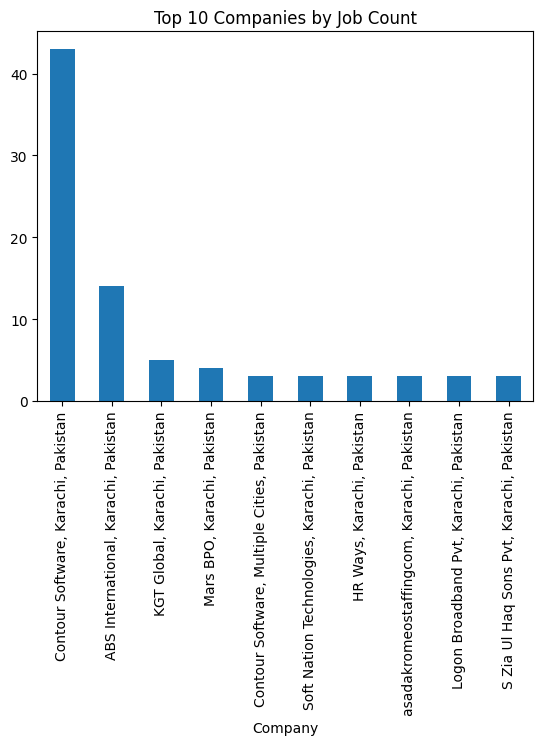

In [63]:

import matplotlib.pyplot as plt
import seaborn as sns
df_cleaned['Company'].value_counts().head(10).plot(kind='bar', title='Top 10 Companies by Job Count');

C:\Users\Yousuf Traders\AppData\Local\Temp\ipykernel_7028\3384902572.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Date Posted'] = pd.to_datetime(df['Date Posted'], errors='coerce');


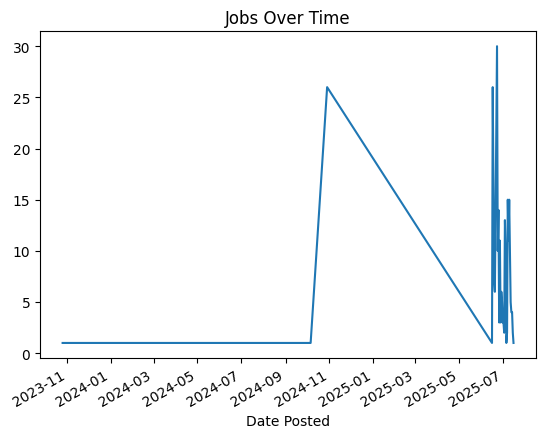

In [66]:
df_cleaned['Date Posted'] = pd.to_datetime(df['Date Posted'], errors='coerce');
df_cleaned['Date Posted'].value_counts().sort_index().plot(kind='line', title='Jobs Over Time');


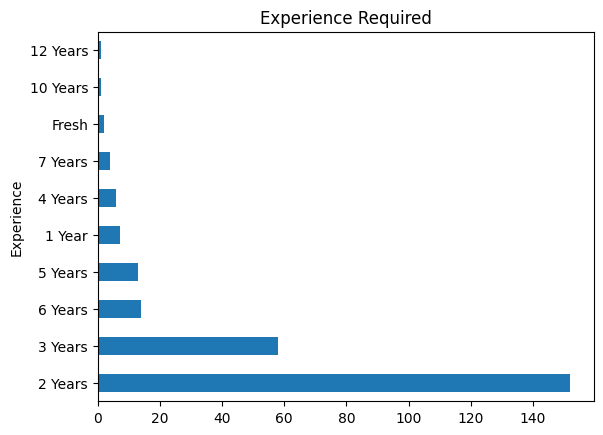

In [69]:
df_cleaned['Experience'].value_counts().head(10).plot(kind='barh', title='Experience Required');


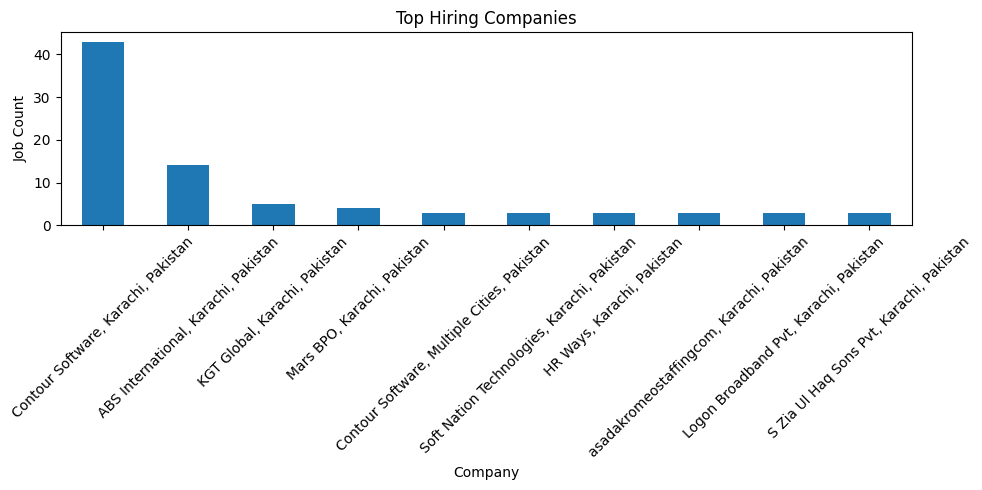

In [70]:
df_cleaned['Company'].value_counts().head(10).plot(kind='bar', title='Top Hiring Companies', figsize=(10,5))
plt.xlabel("Company")
plt.ylabel("Job Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## we can see above which company has more requirement.

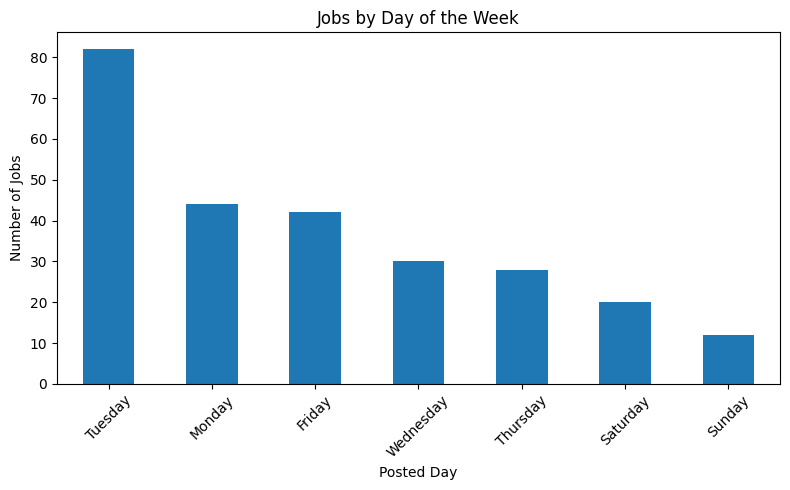

In [72]:
df_cleaned['Posted Day'] = df_cleaned['Date Posted'].dt.day_name()
df_cleaned['Posted Day'].value_counts().plot(kind='bar', title='Jobs by Day of the Week', figsize=(8,5))
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## So by looking the posting date we found Tuesday is the day when most jobs are posted.